<a href="https://colab.research.google.com/github/AarohSinha100/DEEP_LEARNING/blob/main/Neural_Network_SQUAREDDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf

#Creating the labels
X = np.random.randint(1,100,size=100)
y = X**2 

In [2]:
#Creating the basic required functions

#Plot the predictions
def plot_predictions(train_x,train_y,test_x,test_y,pred):
  plt.figure(figsize=(7,15))
  plt.scatter(train_x,train_y,color="g",label="Training Data")
  plt.scatter(test_x,test_y,color="r",label="Testing Data")
  plt.scatter(test_x,pred,color="b",label="Predictions")
  plt.legend()

def mae(y_test,predictions):
  return tf.metrics.mean_absolute_error(y_test,tf.constant(tf.squeeze(predictions)))

def mse(y_test,predictions):
  return tf.metrics.mean_squared_error(y_test,tf.constant(tf.squeeze(predictions)))

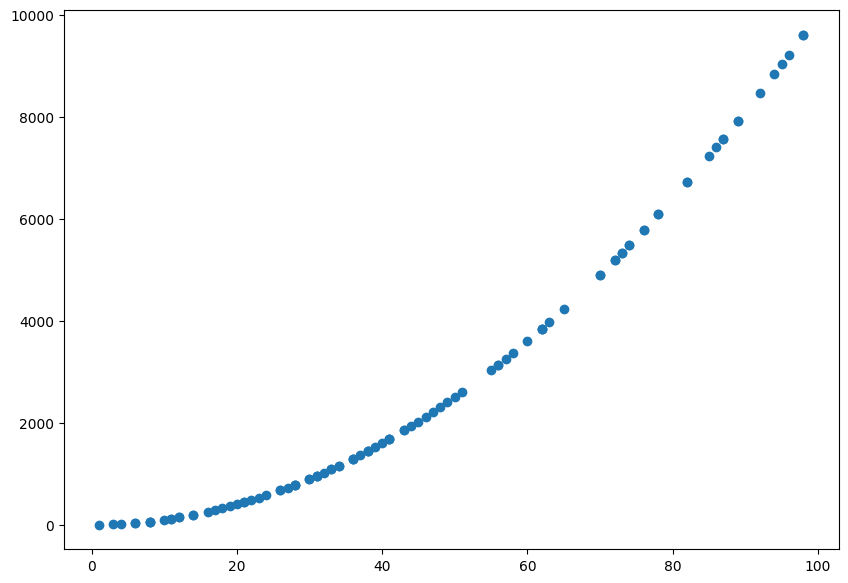

In [3]:
#Visualizing the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X,y)

# Creating the train and test set

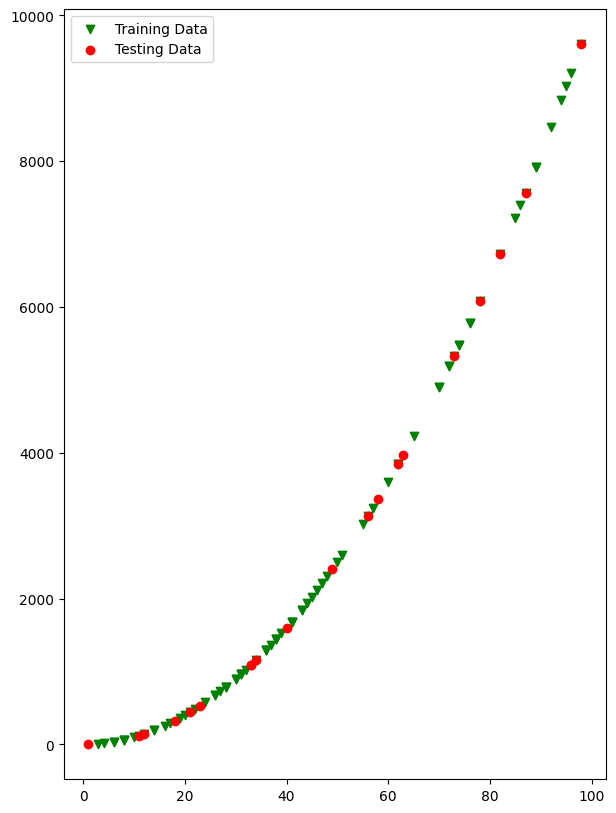

In [4]:
X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

plt.figure(figsize=(7,10))

plt.scatter(X_train,y_train,c="g",label="Training Data",marker="v")
plt.scatter(X_test,y_test,c="r",label="Testing Data")
plt.legend()

# Creating our first basic Model

In [5]:
tf.random.set_seed(42)

#1. Creating the mdoel
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the data
model_1.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit
model_1.fit(tf.expand_dims(X_test,axis=1),y_test,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 458ms/step - loss: 2902.4922 - mae: 2902.4922
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 2880.7668 - mae: 2880.7668
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 2859.0867 - mae: 2859.0867
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 2837.4561 - mae: 2837.4561
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 2815.8254 - mae: 2815.8254
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 2794.1948 - mae: 2794.1948
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 2772.5640 - mae: 2772.5640
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 2750.9336 - mae: 2750.9336
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 2729.3030 - mae: 2729.3030
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 2707.6724 - mae: 2707.6724
Epoch 11/1

1/1 [==============================] - 0s 149ms/step


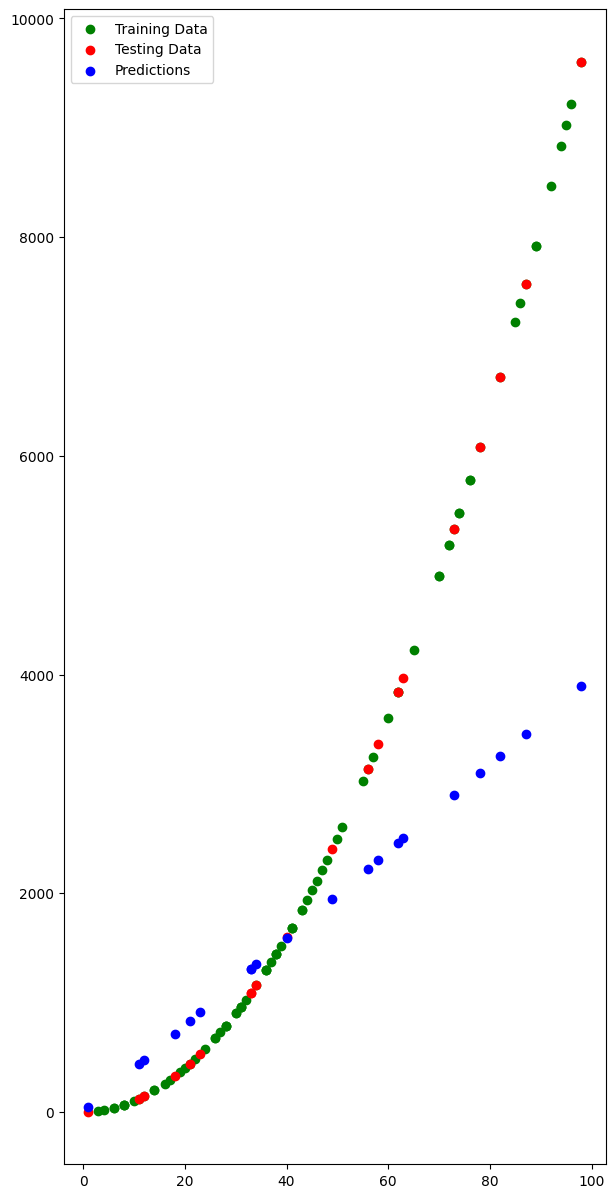

In [6]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_1)
#PROBABLY THE EPOCHS ARE VERY LOW OR THE DATA IS VERY SMALL

In [7]:
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1324.8405>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4172690.8>)

In [8]:
# Second Model with some changes

In [15]:
#Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"]) #This time we are using the adam 

model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 11ms/step - loss: 2745.1536 - mae: 2745.1536
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 2741.5928 - mae: 2741.5928
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 2738.0393 - mae: 2738.0393
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 2734.5876 - mae: 2734.5876
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 2730.9443 - mae: 2730.9443
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 2727.4009 - mae: 2727.4009
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 2723.9688 - mae: 2723.9688
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 2720.4104 - mae: 2720.4104
Epoch 9/200
3/3 [==============================] - 0s 6ms/step - loss: 2716.8601 - mae: 2716.8601
Epoch 10/200
3/3 [==============================] - 0s 6ms/step - loss: 2713.1836 - mae: 2713.1836
Epoch 11/200
3/3 

1/1 [==============================] - 0s 54ms/step


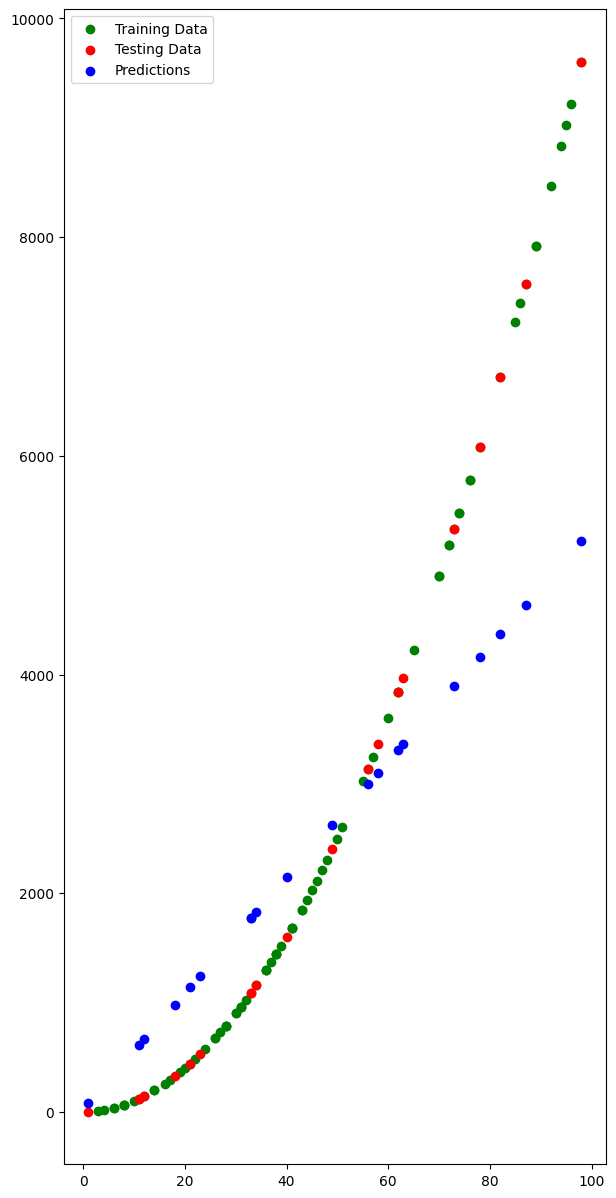

In [16]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_2)

# Okay so lets add some more data to the dataset

In [55]:
X = np.random.randint(1,400,size=5000)
y = X**2

X_train = X[:4000]
y_train = y[:4000]
X_test = X[4000:]
y_test = y[4000:]



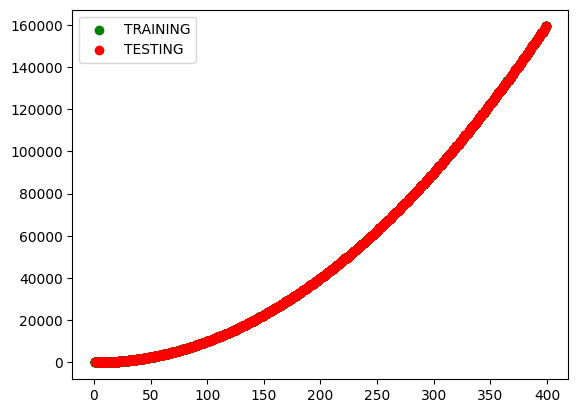

In [56]:
plt.scatter(X_train,y_train,c="g",label="TRAINING")
plt.scatter(X_test,y_test,c="r",label="TESTING")
plt.legend()

# Lets Build model this time

In [57]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=2000)

Epoch 1/2000
125/125 [==============================] - 1s 2ms/step - loss: 53362.9062 - mae: 53362.9062
Epoch 2/2000
125/125 [==============================] - 0s 2ms/step - loss: 53304.0703 - mae: 53304.0703
Epoch 3/2000
125/125 [==============================] - 0s 2ms/step - loss: 53243.5625 - mae: 53243.5625
Epoch 4/2000
125/125 [==============================] - 0s 2ms/step - loss: 53172.6289 - mae: 53172.6289
Epoch 5/2000
125/125 [==============================] - 0s 2ms/step - loss: 53080.6953 - mae: 53080.6953
Epoch 6/2000
125/125 [==============================] - 0s 2ms/step - loss: 52956.9531 - mae: 52956.9531
Epoch 7/2000
125/125 [==============================] - 0s 2ms/step - loss: 52797.1836 - mae: 52797.1836
Epoch 8/2000
125/125 [==============================] - 0s 2ms/step - loss: 52602.9375 - mae: 52602.9375
Epoch 9/2000
125/125 [==============================] - 0s 2ms/step - loss: 52377.1211 - mae: 52377.1211
Epoch 10/2000
125/125 [==============================] 

32/32 [==============================] - 0s 1ms/step


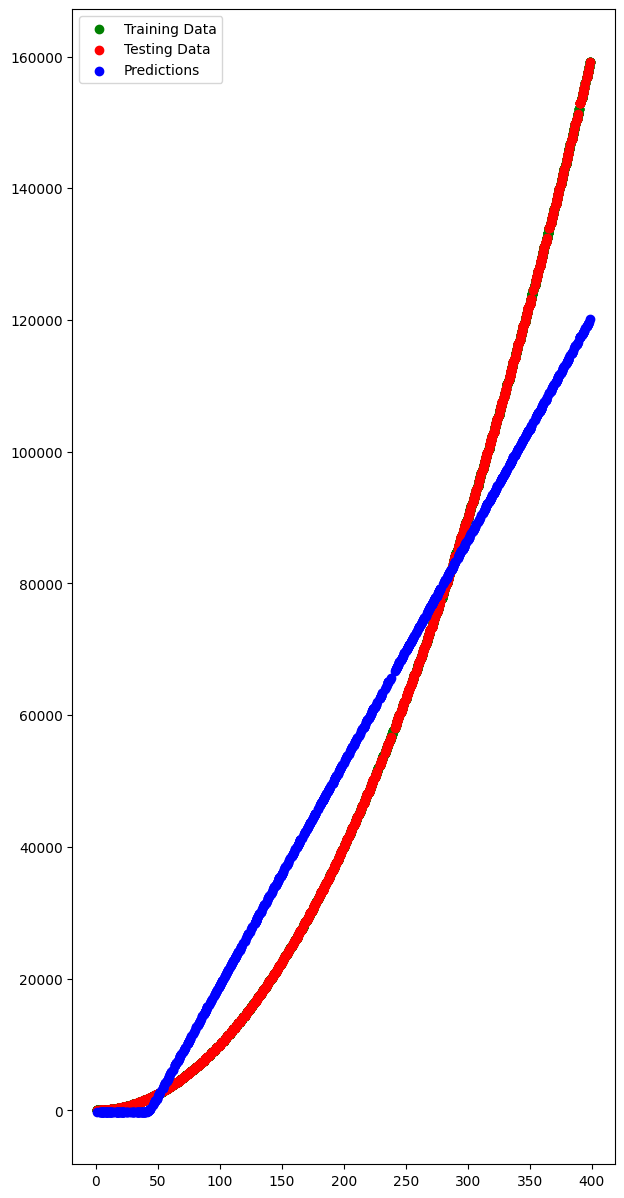

In [58]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_3)
#Seems more epochs would have been good as this is a comp;ex task for algo to predict

1/1 [==============================] - 0s 50ms/step


array([[86618.74]], dtype=float32)